# Three-dimensional density wave

In [6]:
using JLD2, Plots, LaTeXStrings

In [7]:
path = "../results/20231012_euler_h_refine/"

e_p4_mm_ec = load_object(string(path, 
        "ModalMulti_Tet_FluxDifferencingForm_p4/EntropyConservativeNumericalFlux/errors.jld2"))
e_p4_mm_lf = load_object(string(path, 
        "ModalMulti_Tet_FluxDifferencingForm_p4/LaxFriedrichsNumericalFlux/errors.jld2"))
e_p4_mt_ec = load_object(string(path, 
        "ModalTensor_Tet_FluxDifferencingForm_p4/EntropyConservativeNumericalFlux/errors.jld2"))
e_p4_mt_lf = load_object(string(path, 
        "ModalTensor_Tet_FluxDifferencingForm_p4/LaxFriedrichsNumericalFlux/errors.jld2"))

e_p5_mm_ec = load_object(string(path, 
        "ModalMulti_Tet_FluxDifferencingForm_p5/EntropyConservativeNumericalFlux/errors.jld2"))
e_p5_mm_lf = load_object(string(path, 
        "ModalMulti_Tet_FluxDifferencingForm_p5/LaxFriedrichsNumericalFlux/errors.jld2"))
e_p5_mt_ec = load_object(string(path, 
        "ModalTensor_Tet_FluxDifferencingForm_p5/EntropyConservativeNumericalFlux/errors.jld2"))
e_p5_mt_lf = load_object(string(path, 
        "ModalTensor_Tet_FluxDifferencingForm_p5/LaxFriedrichsNumericalFlux/errors.jld2"));

In [8]:
h = [2.0/2^n for n in 1:5]

p4 =plot(xaxis=:log10, yaxis=:log10, windowsize=(350,300), legendfontsize=9,
    fontfamily="Computer Modern", xtickfontsize=12, ytickfontsize=12, 
    xguidefontsize=12, yguidefontsize=12, ylabel="\$L^2\$ error\n", 
    xlabel="\nElement size \$h\$", legend=:topleft,  ylims=[5e-9,10e-1], xlims=[0.05,1.5],
    xticks=([0.1, 1.0], [L"10^{-1}", L"10^{0}"]),
    yticks=([1e-8, 1e-6, 1e-4, 1e-2, 1e0], 
    string.([L"10^{-8}", L"10^{-6}", L"10^{-4}",L"10^{-2}",L"10^{0}"])))

start=1
plot!(p4, h[start:end], e_p4_mm_ec[start:end], label="", 
    linewidth=2.0, linestyle=:dot, markershape=:circle, 
    markersize=6, markerstrokewidth=0.0, markerstrokecolor=:slateblue4, 
    color=:slateblue4)
plot!(p4, h[start:end],  e_p4_mm_lf[start:end], label="Multidimensional", 
    linewidth=2.0, linestyle=:solid, markershape=:circle, markersize=6, 
    markerstrokewidth=0.0, markerstrokecolor=:slateblue4, color=:slateblue4)
plot!(p4, h[start:end],  e_p4_mt_ec[start:end], label="", 
    linewidth=2.0, linestyle=:dot, markershape=:square, markersize=3, 
    markerstrokewidth=0.0, color=palette(:default)[2])
plot!(p4, h[start:end] ,  e_p4_mt_lf[start:end], label="Tensor-product", 
    linewidth=2.0, linestyle=:solid, markershape=:square, markersize=3,
    markerstrokewidth=0.0, color=palette(:default)[2])
r1 = h[end]
r2 = h[end-1]
plot!(p4, [r1, r2, r2, r1], 0.16*[r1^5, r2^5, r1^5, r1^5], 
    label=:none, linewidth=2, markerstrokecolor=:black, color=:black,  
    annotations = (0.1624, 0.25*r1^5, L"\mathbf{5:1}", 10));

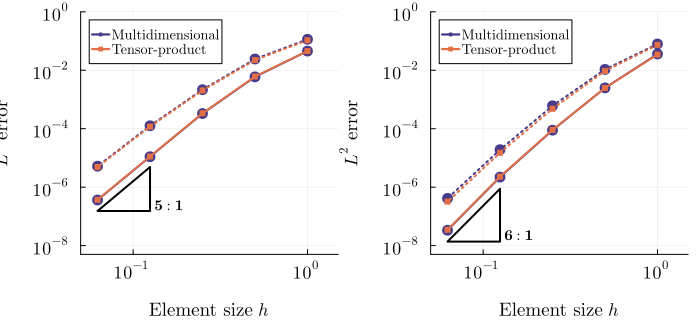

In [9]:
h = [2.0/2^n for n in 1:5]

p5 =plot(xaxis=:log10, yaxis=:log10, windowsize=(350,300), legendfontsize=9,
    fontfamily="Computer Modern", xtickfontsize=12, ytickfontsize=12, 
    xguidefontsize=12, yguidefontsize=12, ylabel="\$L^2\$ error\n", 
    xlabel="\nElement size \$h\$", legend=:topleft,  ylims=[5e-9,10e-1], xlims=[0.05,1.5],
    xticks=([0.1, 1.0], [L"10^{-1}", L"10^{0}"]),
    yticks=([1e-8, 1e-6, 1e-4, 1e-2, 1e0], 
    string.([L"10^{-8}", L"10^{-6}", L"10^{-4}",L"10^{-2}",L"10^{0}"])))

start=1
plot!(p5, h[start:length(e_p5_mm_ec)], e_p5_mm_ec[start:end], label="", linewidth=2.0, linestyle=:dot, 
    markershape=:circle, markersize=6, markerstrokewidth=0.0, markerstrokecolor=:slateblue4, 
    color=:slateblue4)
plot!(p5, h[start:length(e_p5_mm_lf)],  e_p5_mm_lf[start:end], label="Multidimensional", 
    linewidth=2.0, linestyle=:solid, markershape=:circle, markersize=6, 
    markerstrokewidth=0.0, markerstrokecolor=:slateblue4, color=:slateblue4)
plot!(p5, h[start:length(e_p5_mt_ec)],  e_p5_mt_ec[start:end], label="", 
    linewidth=2.0, linestyle=:dot, markershape=:square, markersize=3, 
    markerstrokewidth=0.0, color=palette(:default)[2])
plot!(p5, h[start:length(e_p5_mt_lf)] ,  e_p5_mt_lf[start:end], label="Tensor-product", 
    linewidth=2.0, linestyle=:solid, markershape=:square, markersize=3,
    markerstrokewidth=0.0, color=palette(:default)[2])
r1 = h[end]
r2 = h[end-1]
plot!(p5, [r1, r2, r2, r1], 0.23*[r1^6, r2^6, r1^6, r1^6], 
    label=:none, linewidth=2, markerstrokecolor=:black, color=:black,  
    annotations = (0.162, 0.38*r1^6, L"\mathbf{6:1}", 10))
plot(p4,p5, windowsize=(700,320), bottom_margin=20*Plots.px, fmt=:png)

In [10]:
savefig(p4, "../plots/euler_h_refine_tet_p4.pdf")
savefig(p5, "../plots/euler_h_refine_tet_p5.pdf")

"/Users/tristanmontoya/Research/ReproduceEntropyStableDSEM/plots/euler_h_refine_tet_p5.pdf"